###################################################################################
                # Project : Retail Analysis with Walmart Data #
###################################################################################

Retail Analysis with Walmart Data

DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An 

ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

 

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

 

Dataset Description

This is the historical data which covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

 

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

 

Analysis Tasks

Basic Statistics tasks

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

 

Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [1]:
#Importing required library
import pandas as pd
import numpy as np
import datetime

In [2]:
# Reading dataset and assigning it as WSS
WSS = pd.read_csv("Walmart_Store_sales.csv")
WSS.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
WSS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


from above output it is observed that dataset has no missing values

from above output, Date has type object

In [4]:
# converting date from object type to datetime
WSS.Date = pd.to_datetime(WSS.Date.astype(str), format='%d-%m-%Y')

In [5]:
WSS.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
# Checking data type again
WSS.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

Date is now changed to type datetime

Now, that we are done with all basic data checks lets perform analysis task


Task.1 Which store has maximum sales?


In [7]:
# store that has maximum sales 
WSS.groupby(["Store"]).Weekly_Sales.sum().sort_values(ascending = False).iloc[0:1]
# group by Store and aggregating weekly sales and finding max sales store

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

store 20 has maximum weekly sales

Task.2.1 Which store has maximum standard deviation?

In [8]:
#  store has maximum standard deviation
WSS.groupby(["Store"]).Weekly_Sales.std().sort_values(ascending = False).iloc[0:1]
# group by store and finding max standard deviation for weekly sales

Store
14    317569.949476
Name: Weekly_Sales, dtype: float64

In [9]:
# store 14 has maximum standard deviation

Task.2.2 coefficient mean to standard deviation

In [10]:
# finding standard deviation (sd) and mean for weekly sales
sd = WSS.groupby(['Store']).Weekly_Sales.std()
mean = WSS.groupby(['Store']).Weekly_Sales.mean()

In [11]:
#CV = Sd/mean*100
cv = ((sd/mean)*100).sort_values(ascending = False).reset_index() 
# sorting cv values in decending order and then resetting index
cv.head()

,Store,Weekly_Sales
0,35,22.968111
1,7,19.730469
2,15,19.338399
3,29,18.374247
4,23,17.972115


store 35 has highest coefficient mean to standard deviation ie. 22.93

Task.3 Which stores has good quarterly growth rate in Q3’2012?

In [12]:
# fething Q2 data for year 2012 and grouping by store and aggregating columns
Q2 = WSS[(WSS.Date >= pd.to_datetime("2012-04-01")) &
         (WSS.Date <= pd.to_datetime("2012-06-30"))].groupby(["Store"]).sum().iloc[:,0:1]
Q2.head(3)

,Weekly_Sales
Store,
1,20978760.12
2,25083604.88
3,5620316.49


In [13]:
# fething Q3 data for year 2012 and grouping by store and aggregating columns
Q3 = WSS[(WSS.Date >= pd.to_datetime("2012-07-01")) &
         (WSS.Date <= pd.to_datetime("2012-09-30"))].groupby(["Store"]).sum().iloc[:,0:1]
Q3.head(3)

,Weekly_Sales
Store,
1,20253947.78
2,24303354.86
3,5298005.47


In [14]:
# quarterly growth rate in Q3’2012 = (Q3 - Q2)/Q2
Growth = ((Q3 - Q2)/Q2)*100

In [15]:
# sorting values with respect to weekly sales in decending order
Growth = Growth.sort_values('Weekly_Sales', ascending = False)
Growth.head()

,Weekly_Sales
Store,
7,13.330776
16,8.488378
35,4.466637
26,3.955478
39,2.478404


store 7 has higher growth rate in Q3.2012 with 13.3 %

Task.4. Some holidays have a negative impact on sales.
Find out holidays which have higher sales than the mean sales in non-holiday season 
for all stores together

Holidays 

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


non holiday week = 0
holiday week = 1

In [16]:
WSS.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106


In [17]:
# finding mean values for non holiday weekly sales
mean_Non_Holiday_Weekly_Sales = WSS[WSS.Holiday_Flag == 0].Weekly_Sales.mean()
mean_Non_Holiday_Weekly_Sales

1041256.3802088564

In [18]:
# finding maximum sales on holidays
Max_Sales = WSS[WSS.Holiday_Flag == 1].groupby(
    ['Date']).sum().reset_index().iloc[:,0:3].drop(
    "Store", axis = 1).rename({"Weekly_Sales" : "Holiday_Weekly_Sales"}, axis=1)

Max_Sales.head(10)

,Date,Holiday_Weekly_Sales
0,2010-02-12,48336677.63
1,2010-09-10,45634397.84
2,2010-11-26,65821003.24
3,2010-12-31,40432519.00
4,2011-02-11,47336192.79
5,2011-09-09,46763227.53
6,2011-11-25,66593605.26
7,2011-12-30,46042461.04
8,2012-02-10,50009407.92
9,2012-09-07,48330059.31


In [19]:
Max_Sales["Mean comparision"] = Max_Sales.Holiday_Weekly_Sales > mean_Non_Holiday_Weekly_Sales
Max_Sales.head(10)

,Date,Holiday_Weekly_Sales,Mean comparision
0,2010-02-12,48336677.63,True
1,2010-09-10,45634397.84,True
2,2010-11-26,65821003.24,True
3,2010-12-31,40432519.00,True
4,2011-02-11,47336192.79,True
5,2011-09-09,46763227.53,True
6,2011-11-25,66593605.26,True
7,2011-12-30,46042461.04,True
8,2012-02-10,50009407.92,True
9,2012-09-07,48330059.31,True


 Task.5 Provide a monthly and semester view of sales in units and give insights


In [20]:
WSS.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106


In [21]:
# adding Year and Month column in data
WSS["Year"] = WSS.Date.dt.year
WSS["Month"] = WSS.Date.dt.month
WSS.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2


In [22]:
# Creating new data set with weekly sales, Year and Month
WSS1 = pd.DataFrame({"Weekly_Sales": WSS.Weekly_Sales,
                     "Month": (WSS.Date.dt.month), "Year" : (WSS.Date.dt.year)})
WSS1.head()

,Weekly_Sales,Month,Year
0,1643690.90,2,2010
1,1641957.44,2,2010
2,1611968.17,2,2010
3,1409727.59,2,2010
4,1554806.68,3,2010


In [23]:
# grouping by Year and Month and aggregating for Weekly sales
Month_Year_wise_sale = WSS1.groupby(["Month","Year"]).sum().unstack().fillna(0)
# month and year wise sales
Month_Year_wise_sale

Weekly_Sales                            
Year           2010          2011          2012
Month                                          
1      0.000000e+00  1.637040e+08  1.688945e+08
2      1.903330e+08  1.863313e+08  1.920636e+08
3      1.819198e+08  1.793564e+08  2.315097e+08
4      2.314124e+08  2.265265e+08  1.889209e+08
5      1.867109e+08  1.816482e+08  1.887665e+08
6      1.922462e+08  1.897734e+08  2.406103e+08
7      2.325801e+08  2.299114e+08  1.875095e+08
8      1.876401e+08  1.885993e+08  2.368508e+08
9      1.772679e+08  2.208477e+08  1.806455e+08
10     2.171618e+08  1.832613e+08  1.843617e+08
11     2.028534e+08  2.101624e+08  0.000000e+00
12     2.887605e+08  2.880781e+08  0.000000e+00

In [24]:
# grouping by Year and Month and aggregating for Weekly sales
#Month_Year_wise_sale.unstack().fillna(0)

space left for sorting by defination method

In [25]:
WSS1.head()

,Weekly_Sales,Month,Year
0,1643690.90,2,2010
1,1641957.44,2,2010
2,1611968.17,2,2010
3,1409727.59,2,2010
4,1554806.68,3,2010


In [26]:
# adding year month and year semester column
WSS["year.month"] = WSS.Year.astype(str) + "." + WSS.Month.astype(str)
WSS["year.semester"] = WSS.Year.astype(str) + "." + np.where(WSS.Month.gt(6),2,1).astype(str)

In [27]:
#alternate method

#WSS["m"] = WSS.Date.dt.year.astype(str) + "." + WSS.Date.dt.month.astype(str)
#WSS["y"] = WSS.Date.dt.year.astype(str) + "." + np.where(WSS.Date.dt.quarter.gt(2),2,1).astype(str)

In [28]:
WSS.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,year.month,year.semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,2010.2,2010.1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,2010.2,2010.1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,2010.2,2010.1


In [29]:
#Semester wise sales
WSS.groupby("year.semester").Weekly_Sales.sum().reset_index()

,year.semester,Weekly_Sales
0,2010.1,9.826223e+08
1,2010.2,1.306264e+09
2,2011.1,1.127340e+09
3,2011.2,1.320860e+09
4,2012.1,1.210765e+09
5,2012.2,7.893674e+08


Task. 6 Demand forcast using Multiple Linear Model


For Store 1 – Build  prediction models to forecast demand


Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
(starting from the earliest date in order).


Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [30]:
#Store 1 data
store_1 = WSS[WSS.Store == 1]
store_1.describe().iloc[:,0:2]

,Store,Weekly_Sales
count,143.0,1.430000e+02
mean,1.0,1.555264e+06
std,0.0,1.559808e+05
min,1.0,1.316899e+06
25%,1.0,1.458105e+06
50%,1.0,1.534850e+06
75%,1.0,1.614892e+06
max,1.0,2.387950e+06


In [31]:
import matplotlib.pyplot as plt

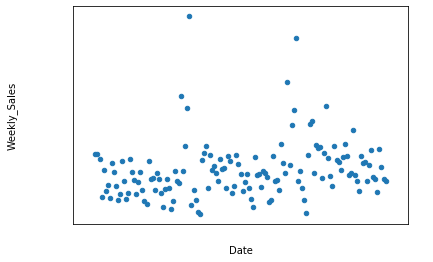

In [32]:
store_1.plot(x = "Date", y = "Weekly_Sales", kind = "scatter")
plt.tick_params(axis='x', colors ='w') # plot x axis color
plt.tick_params(axis='y', colors ='w') # plot y axis color

def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - 1.5 * IQR
 upper_range = Q3 + 1.5 * IQR
 return lower_range,upper_range

In [33]:
Q1 = store_1.Weekly_Sales.quantile(0.25)
Q3 = store_1.Weekly_Sales.quantile(0.75)
IQR = Q3 - Q1
lowerbound = Q1 - 1.5*IQR # lower_limit
upperbound = Q3 + 1.5*IQR # upper_limit
lowerbound,upperbound

(1222923.6799999997, 1850073.04)

In [34]:
store_1 = store_1[(store_1.Weekly_Sales > lowerbound) & (store_1.Weekly_Sales < upperbound)]

In [35]:
store_1.describe().iloc[:,0:2]

,Store,Weekly_Sales
count,136.0,1.360000e+02
mean,1.0,1.530028e+06
std,0.0,1.031847e+05
min,1.0,1.316899e+06
25%,1.0,1.455113e+06
50%,1.0,1.527430e+06
75%,1.0,1.604955e+06
max,1.0,1.819870e+06


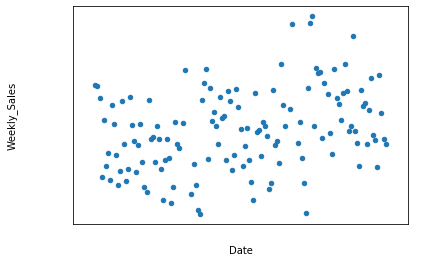

In [36]:
store_1.plot(x = "Date", y = "Weekly_Sales", kind = "scatter")
plt.tick_params(axis='x', colors ='w') # plot x axis color
plt.tick_params(axis='y', colors ='w') # plot y axis color

In [37]:
#Training and Testing data
x_input = store_1.iloc[:,4:8]
y_output = store_1.iloc[:,2:3]

In [38]:
x_input.head(3)

,Temperature,Fuel_Price,CPI,Unemployment
0,42.31,2.572,211.096358,8.106
1,38.51,2.548,211.242170,8.106
2,39.93,2.514,211.289143,8.106


In [39]:
y_output.head(3)

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17


In [56]:
# importing libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_input, y_output, test_size = 0.2,
                                                     random_state = 10)

In [57]:
#printing shape of sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(108, 4) (28, 4) (108, 1) (28, 1)


In [58]:
# importing libraries
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [59]:
# fitting Modle
lm.fit(x_train, y_train)
lm.coef_

array([[ -1675.14544407, -15032.13334256,  11795.59441197,
         18895.36039378]])

In [60]:
# Predicting output values
y_test_predict = lm.predict(x_test)

In [61]:
# Root mean squared error (RMSE) from Linear Regression

#importing metrics library
from sklearn import metrics

metrics.mean_squared_error(y_test, y_test_predict)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
RMSE

98672.57702409403

In [62]:
# Checking accuracy of model by using score method to compare values of x and y test dataset
lm.score(x_test,y_test)

-0.05704654967773948

In [55]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
x_feature = store_1[['CPI','Unemployment','Fuel_Price']]
y_target = store_1['Weekly_Sales']
X2 = sm.add_constant(x_feature)
est = sm.OLS(y_target, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     7.122
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           0.000180
Time:                        10:55:40   Log-Likelihood:                -1752.3
No. Observations:                 136   AIC:                             3513.
Df Residuals:                     132   BIC:                             3524.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.319e+06   1.23e+06     -1.076   